### 1.正态分布 
随机变量X符合正态分布记为:$ X\textasciitilde{N(\mu,\sigma^2)} $ 其中$E(X)=\mu$，方差为$\sigma^2$

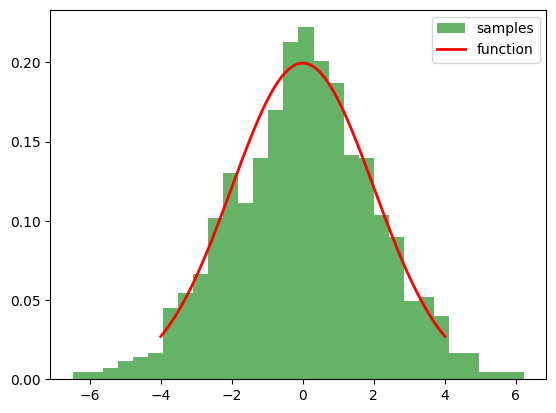

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# defin c mu sigma
mu = 0
sigma = 2

# 随机分布样本 numpy.random.normal(mu,sigma,nums of points)
samples = np.random.normal(mu,sigma,1000)

plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='samples')

# 概率密度函数 scipy.stats.norm.pdf(X,mu,sigma)
x = np.linspace(-4,4,200)
pdf = sp.stats.norm.pdf(x,mu,sigma)
plt.plot(x, pdf, 'r', lw=2, label='function')
plt.legend()
plt.show()

### 2.泊松分布 poisson
随机变量X符合参数为$\lambda$的泊松分布记为:$X\textasciitilde{P(\lambda)}$ ,Poisson分布的数学期望和方差都为$\lambda$.其概率密度函数为
$$P(X=k)=\frac{\lambda^k}{k!}e^{-\lambda},k=1,2,\cdots,\lambda>0$$

[1 3 4 3 3 2 2 2 2 2 1 2 4 5 3 1 2 2 2 0]


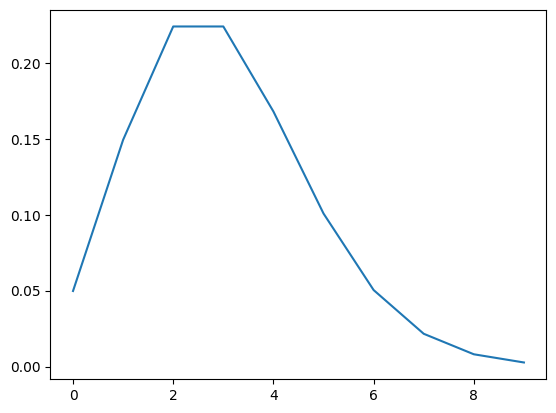

In [51]:
# poisson分布随机数生成:scipy.stats.poisson.rvs(lambda,size)
lambda_poisson = 3
X = sp.stats.poisson.rvs(lambda_poisson, size = 20)
print(X)

# poisson分布概率密度函数:scipy.stats.poisson.pmf(X,lambda)
k = np.arange(0,10)
probability = sp.stats.poisson.pmf(k, lambda_poisson)
plt.plot(k, probability)
plt.show()

### 3.二项分布
随机变量X符合二项分布记为:$X$~$B(n,p)$,其中p是单次实验的成功率，n是实验次数
$E(X)=np,\sigma^2(X)=np(1-p)，P(X=k)=C_{n}^kp^k(1-p)^{n-k}$


[2 4 4 3 4 6 0 2 5 3]


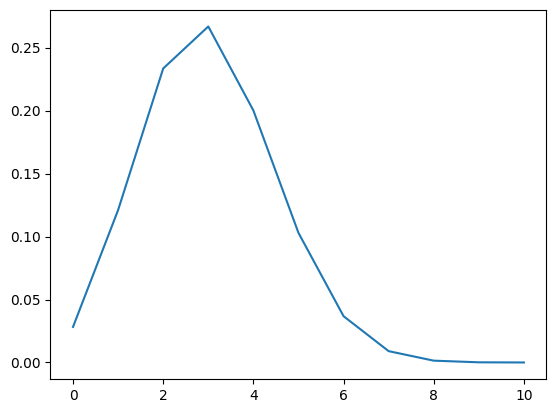

In [69]:
# 二项分布随机数生成:scopy.stats.binom.rvs(n, p, size)
n = 10
p = 0.3
X = sp.stats.binom.rvs(n, p, size = 10)
print(X)

# 二项分布概率密度函数:scipy.stats.binom.pmf(X, n, p)
X = np.arange(0,11)
Probability = sp.stats.binom.pmf(X, n, p)
plt.plot(X,Probability)
plt.show()

### 4.指数分布
随机变量X符合参数为$\lambda$或者$\beta$的指数分布记为:$X$ ~ $Exp(\lambda)$或者$X$ ~ $Exp(\beta)$

$E(X)=\frac{1}{\lambda}=\beta,\sigma^2(X)=\frac{1}{\lambda^2}=\beta^2$

$f(x,\lambda) = \begin{cases} \lambda e^{-\lambda x} & x \geq 0 \\ 0 & x<0\end{cases}$

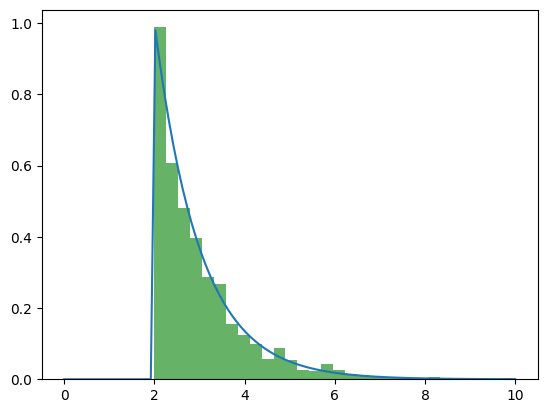

In [89]:
# 指数分布随机数:scipy.stats.expon.rvs(bata, size)
lambda_exp = 0.5
beta = 1/lambda_exp
samples = sp.stats.expon.rvs(beta, size = 1000)
plt.hist(samples, bins = 30, density=True, alpha=0.6, color='g', label="samples")

# 指数分布概率函数:scipy.stats.expon.pdf(X,beta)
X = np.linspace(0,10,100)
probability = sp.stats.expon.pdf(X, beta)
plt.plot(X,probability)
plt.show()

### 5.超几何分布
随机变量X服从参数为K，N的超几何分布记为:$X$ ~ $H(n,K,N)$

$E(X)=\frac{nK}{N},\sigma^2(X)=\frac{nK(N-K)(N-n)}{N^2(N-1)}$
其概率密度函数为:$f(k;n,K,N)=\frac{C_K^kC_{N-K}^{n-k}}{C_N^n}$

[5 4 8 7 6 5 4 7 8 5]


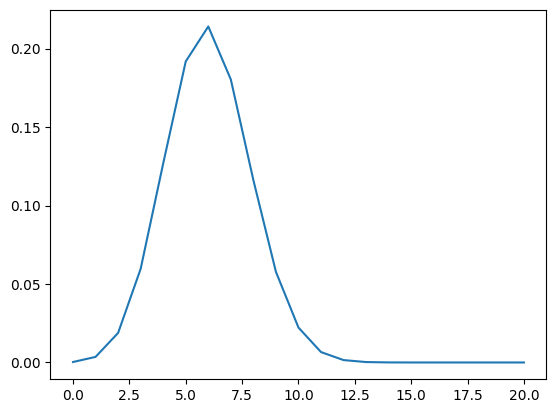

In [94]:
# 参数定义
N = 100 # 100件
K = 30 # 次品
n = 20

# 超几何分布随机数:scipy.stats.hypergeom.rvs(N, K, n, size)
X = sp.stats.hypergeom.rvs(N, K, n, size = 10)
print(X)

# 超几何分布概率函数:scipy.stats.hypergeom.pmf(k, N, K, n)
k = np.arange(0,n+1)
probability = sp.stats.hypergeom.pmf(k, N, K, n)
plt.plot(k, probability)
plt.show()

### 贝叶斯分类器

原理：贝叶斯分类器基于贝叶斯定理，旨在利用已知数据来模拟出新数据属于不同类别的概率，然后选择具有最高概率的类别作为分类结果，做出相应的决策

In [115]:
class NaiveBayesClassifier:
    def __init__(self) :
        self.classes = set() # 存储所有C_i类别
        self.classes_prob = dict() # 每个C_i出现的可能性
        self.condition_prob = dict() # 每个C_i在A下的条件概率
        self.P0 = 1 # 先验概率

    # 训练函数
    def fit(self, spam_data_matrix, ham_data_matrix):
        from math import log
        spam_dim = len(spam_data_matrix)
        ham_dim = len(ham_data_matrix)
        dim = spam_dim + ham_dim
        self.P0 = log(spam_dim / dim)

        for line in spam_data_matrix:
            self.classes.update(set(line))
        for line in ham_data_matrix:
            self.classes.update(set(line))

        # C_i总体概率 和 条件概率
        for word in self.classes:
            spamif = 0
            hamif = 0
            for line in spam_data_matrix:
                if word in line:
                    spamif += 1
            for row in ham_data_matrix:
                if word in row:
                    hamif += 1
            self.classes_prob[word] = (spamif + hamif) / dim
            self.condition_prob[word] = (spamif) / spam_dim
        class_prob_sum = sum(self.classes_prob.values())
        condition_prob_sum = sum(self.condition_prob.values())
        self.classes_prob = {key:value/class_prob_sum for key,value in self.classes_prob.items()}
        self.condition_prob = {key:value/condition_prob_sum for key,value in self.condition_prob.items()}

        spam_p = (spam_dim + ham_dim) / dim
        return spam_dim, self.classes_prob, self.condition_prob

    # 判断每一个行是不是一个符合A
    def IsSpam(self,data_list):
        from math import log
        condition_prob = 0
        # 在计算条件概率时，添加平滑值（alpha）到分子和分母中
        alpha = 1  # laplace平滑参数
        dim = len(self.classes)
        for word in data_list:
            if word in self.classes:
                condition_prob += log((self.condition_prob[word] + alpha) / (self.classes_prob[word] + alpha * dim))

        P = self.P0 + condition_prob

        # 将1/2的对数概率作为阈值来判断
        threshold = log(1/2)
        if P >= threshold:
            print(P)
            return True
        else:
            return False

        # 做总体预测
    def predict(self, data_matrix):
        total_dim = len(data_matrix)
        isspam = []
        for item in data_matrix:
            if self.IsSpam(item) == True:
                isspam.append(True)
            else:
                isspam.append(False)
        return isspam


class BayesFile:
    def __init__(self, pwd) :
        self.pwd = pwd
        self.excluded_words = set()
        self.load_excluded_words()

    def load_excluded_words(self):
        with open(self.pwd+"/excluded_words.txt","r",encoding="utf-8") as file:
            self.excluded_words = set(word.strip() for word in file.readlines())

    def process_file(self, file_path):
        # 读取文件并将文章分割成单词
        words = []
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            words = text.split()  # 简单地使用空格分割
        words = [word for word in words if word.lower() not in self.excluded_words]
        return words

    def build_matrix(self):
        from os import path
        SpamMatrix = []
        HamMatrix = []
        for i in range(1, 26):
            file_name = f'{i}.txt'
            file_path = path.join(self.pwd+"/email/spam", file_name)
            if path.isfile(file_path):
                words = self.process_file(file_path)
                SpamMatrix.append(words)
            file_path = path.join(self.pwd+"/email/ham", file_name)
            if path.isfile(file_path):
                words = self.process_file(file_path)
                HamMatrix.append(words)

        return SpamMatrix,HamMatrix

def detect():
    NBC = NaiveBayesClassifier()
    FileMatrix = BayesFile(pwd="/home/jxluo/ubuntu/WorkPlace/grade3/Computer-Simulations/Homeworks/hw02")

    FileMatrix.load_excluded_words()
    ham, spam = FileMatrix.build_matrix()

    NBC.fit(ham_data_matrix=ham, spam_data_matrix=spam)
    # 随机选择一些样本
    def choice():
        indexLst = []
        detect_file = []
        from random import choice
        for index in range(20):
            k = choice([0,1])
            index = choice(range(1,25))
            if k == 1:
                indexLst.append(True)
                detect_file.append(spam[index])
            else:
                indexLst.append(False)
                detect_file.append(ham[index])
        return detect_file, indexLst

    Matrix, lst = choice()
    result = NBC.predict(Matrix)
    RightNum = sum(1 if result[index] == lst[index] else 0 for index in range(len(lst)))
    ratio = RightNum/len(lst)
    return ratio

print("检测成功率:{:.2f}%".format(detect()*100))



检测成功率:65.00%


上述代码创建了一个朴素bayes选择器类NaiveBayesClassifier，用类BayesFIles做文件处理，传递给选择器。重现了实例demo_email_spam.pdf